In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
# Attempt to load the dataset with a different encoding to handle special characters
file_path = "/content/sample_data/raw_data.csv"

# Trying ISO-8859-1 encoding
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows to verify successful loading
df.head()


,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [6]:
df.columns = df.columns.str.strip().str.replace("\u00a0", "").str.replace(" ", "_").str.lower()

# Cleaning data: Removing unwanted spaces in the values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Converting numerical columns to appropriate types
df["height"] = pd.to_numeric(df["height"], errors='coerce')
df["weight"] = pd.to_numeric(df["weight"], errors='coerce')
df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["grip_strength"] = pd.to_numeric(df["grip_strength"], errors='coerce')

# Displaying the cleaned dataset using pandas display function
# This replaces the ace_tools function
print("Cleaned Dataset:")  # Adding a descriptive title
display(df)

Cleaned Dataset:


<ipython-input-6-bf665f4164cd>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,height,weight,age,grip_strength,frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


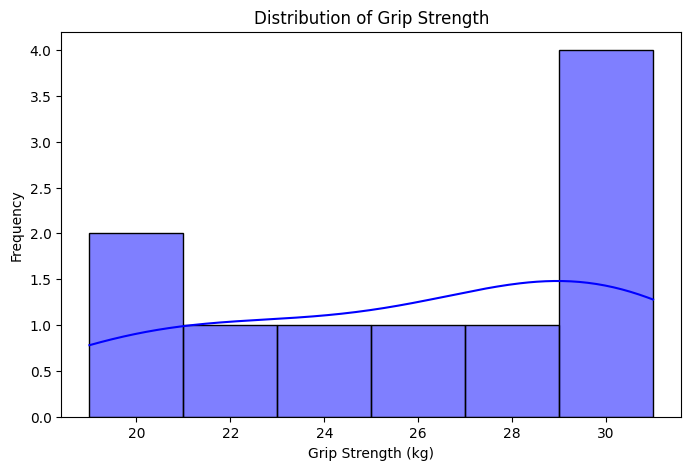

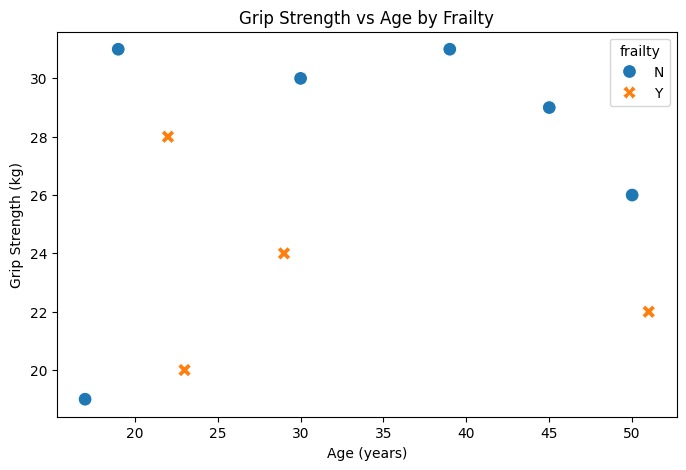

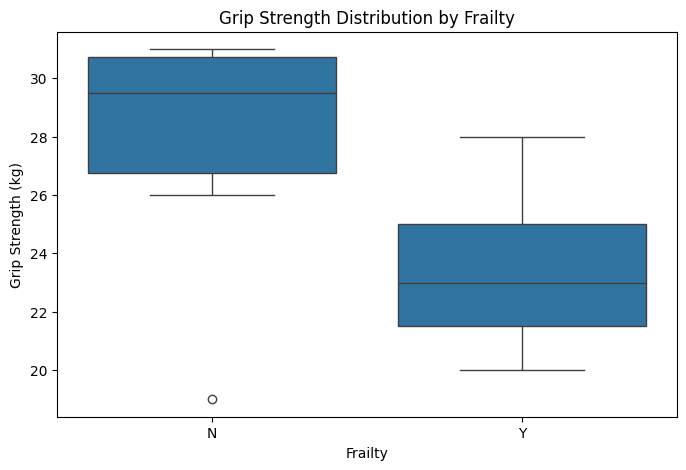

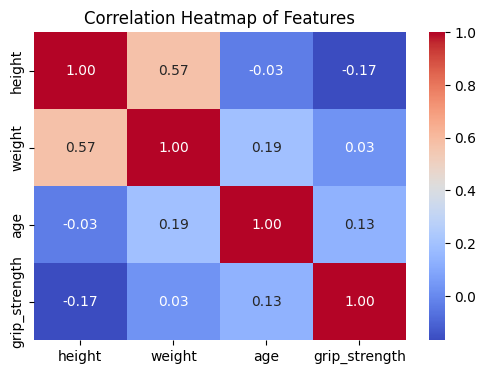

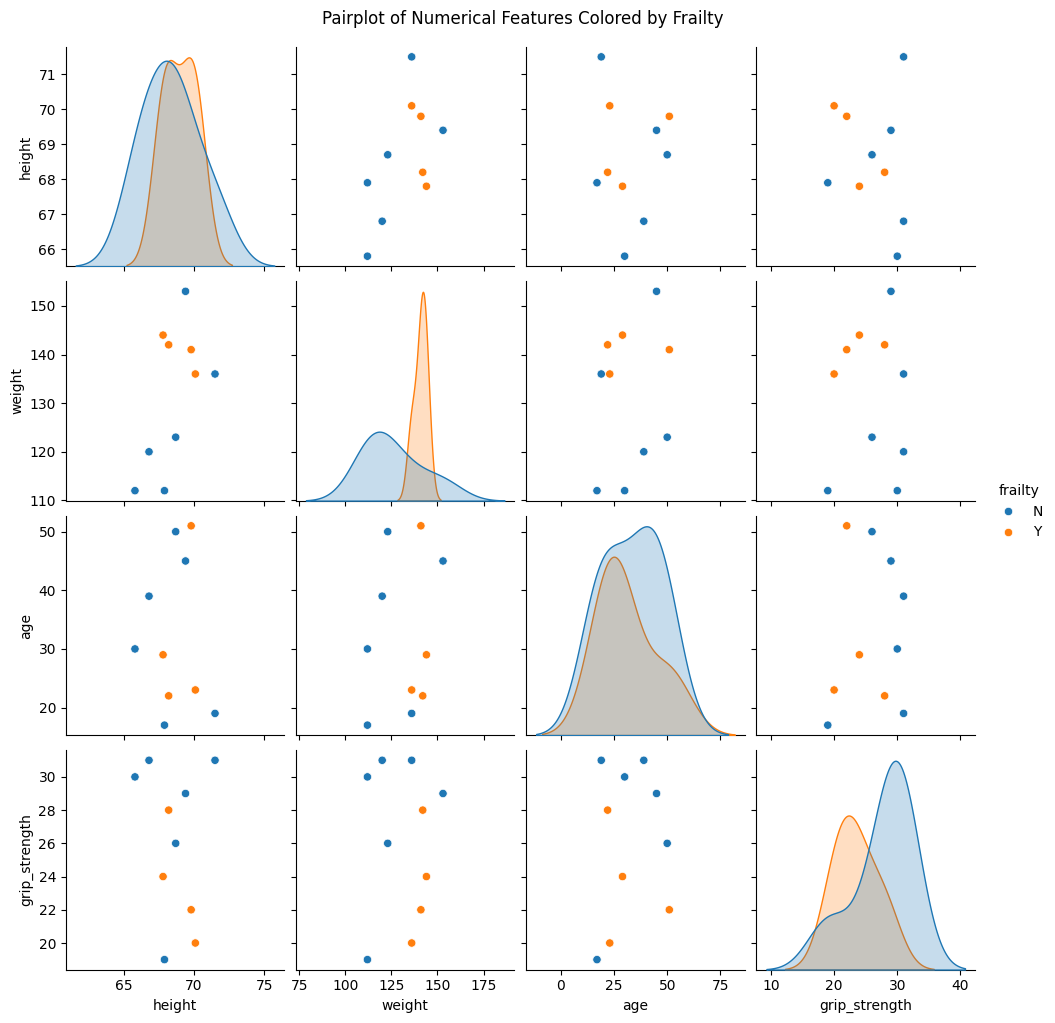

In [7]:
# Visualization 1: Distribution of Grip Strength
plt.figure(figsize=(8,5))
sns.histplot(df["grip_strength"], bins=6, kde=True, color="blue")
plt.xlabel("Grip Strength (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Grip Strength")
plt.show()

# Visualization 2: Scatter Plot of Grip Strength vs Age Colored by Frailty
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["age"], y=df["grip_strength"], hue=df["frailty"], style=df["frailty"], s=100)
plt.xlabel("Age (years)")
plt.ylabel("Grip Strength (kg)")
plt.title("Grip Strength vs Age by Frailty")
plt.show()

# Visualization 3: Boxplot of Grip Strength by Frailty
plt.figure(figsize=(8,5))
sns.boxplot(x=df["frailty"], y=df["grip_strength"])
plt.xlabel("Frailty")
plt.ylabel("Grip Strength (kg)")
plt.title("Grip Strength Distribution by Frailty")
plt.show()

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Visualization 5: Pairplot to see relationships between numerical features
sns.pairplot(df, hue="frailty", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features Colored by Frailty", y=1.02)
plt.show()
